<a href="https://colab.research.google.com/github/Naveenchander1997/CatvsDog/blob/main/CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We show how to classify the Cats or Dogs. It builds a image classifier using a tf.keras.Sequential model and loading the data using tf.keras.preprocessing.image.ImageDataGenerator

#  The basic Machine Learning Workflow

1.   Examine and understand the data
2.   Build an input pipeline
3.   Build the Model
4.   Train the Model
5.   Test the Model
6.   Improve the Model and repeat the process









In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import matplotlib.pyplot as plt


In [ ]:
_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip',origin=_url,extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip),'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


In [ ]:
! ls

sample_data


In [ ]:
! cd sample_data

In [ ]:
! ls -a

.  ..  .config	sample_data


In [ ]:
train_dir = os.path.join(PATH,'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir,'cats') # directory with our Training cat pictures
train_dogs_dir = os.path.join(train_dir,'dogs') # directory with our Training dog pictures
validation_cats_dir = os.path.join(validation_dir,'cats') # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir,'dogs') # directory with our validation dog pictures

In [ ]:
num_cat_tr = len(os.listdir(train_cats_dir))
num_dog_tr = len(os.listdir(train_dogs_dir))

num_cat_val = len(os.listdir(validation_cats_dir))
num_dog_val = len(os.listdir(validation_dogs_dir))

total_train = num_cat_tr + num_dog_tr
total_validation = num_cat_val + num_dog_val

In [ ]:
print('Total training cat images:',num_cat_tr)
print('Total training dog images:',num_dog_tr)

print('Total validation cat images:',num_cat_val)
print('Total validation dog images:',num_dog_val)
print("---")
print('Total training images:',total_train)
print('Total validation images:',total_validation)

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
---
Total training images: 2000
Total validation images: 1000


In [ ]:
batch_size = 128
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
### Pre-processing done by ImageDataGenerator ###
train_image_generator = ImageDataGenerator(rescale=(1./255)) # generator for our training data 
validation_image_generator = ImageDataGenerator(rescale=(1./255)) # generator for our validation data

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
"The next function will return the batches from the dataset"
sample_training_images,_ = next(train_data_gen)

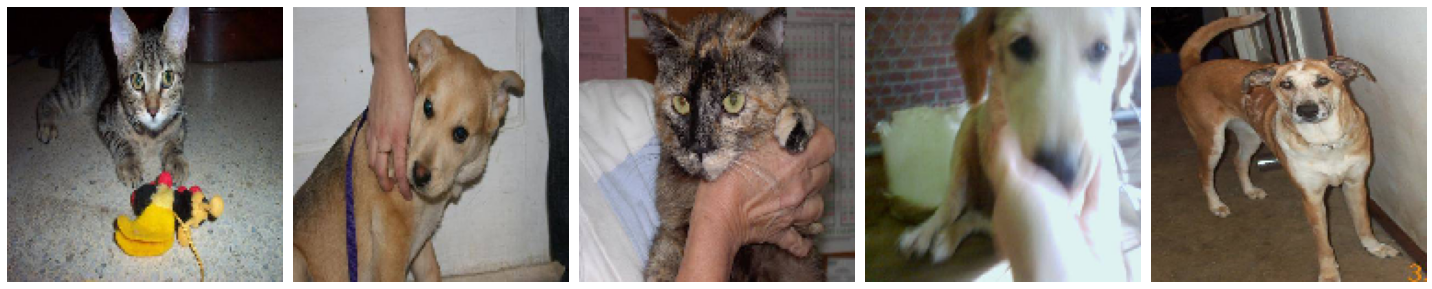

In [ ]:
# This function will plot the images with 1 row and 5 columns
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImages(sample_training_images[:5]) 

## Create the model

In [ ]:
model = Sequential([
      Conv2D(16,5,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
      MaxPooling2D(),
      Conv2D(32,5,padding='same',activation='relu'),
      MaxPooling2D(),
      Conv2D(64,5,padding='same',activation='relu'),
      MaxPooling2D(),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

use the fit_generator method of the ImageDataGenerator class to train the network

In [ ]:
history = model.fit_generator(generator=train_data_gen,
                              steps_per_epoch=total_train//batch_size,
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=total_validation//batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 42s 610ms/step - loss: 0.9226 - accuracy: 0.5145 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 2/50
15/15 [==============================] - 8s 557ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6929 - val_accuracy: 0.4888
Epoch 3/50
15/15 [==============================] - 8s 563ms/step - loss: 0.6908 - accuracy: 0.5064 - val_loss: 0.6856 - val_accuracy: 0.4989
Epoch 4/50
15/15 [==============================] - 8s 563ms/step - loss: 0.6750 - accuracy: 0.5044 - val_loss: 0.6555 - val_accuracy: 0.6250
Epoch 5/50
15/15 [==============================] - 8s 559ms/step - loss: 0.6391 - accuracy: 0.6242 - val_loss: 0.6232 - val_accuracy: 0.6295
Epoch 6/50
15/15 [==============================] - 8s 554ms/step - loss: 0.6006 - accuracy: 0.6574 - val_loss: 0.6148 - val_accuracy: 0.6183
Epoch 7/50
15/15 [==============================] - 8s 550ms/step - loss: 0.5714 - accuracy: 0.6877 - val_loss: 0.6423 - val_accuracy: 0.6719
Epoch

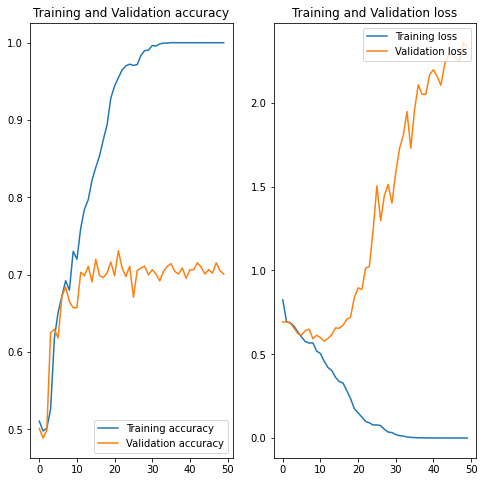

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label = 'Training accuracy')
plt.plot(epochs_range,val_acc,label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label = 'Training loss')
plt.plot(epochs_range,val_loss,label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

# Data augmentation:
## Data augmentation in data analysis are techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model. It is closely related to oversampling in data analysis.

In [ ]:
image_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH))

Found 2000 images belonging to 2 classes.


Take a one sample from the training example and repeat it five times so that the augmentation is applied on the same image five times

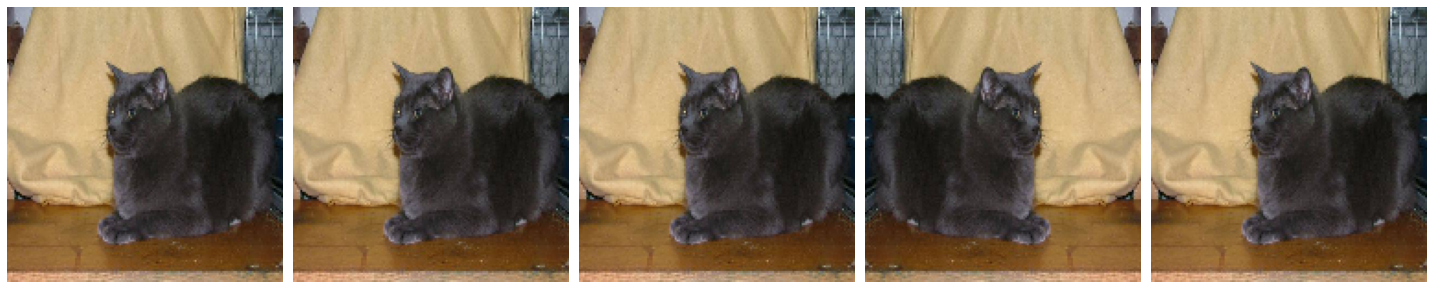

In [ ]:
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the plotting function
plotImages(augmented_image) 

Lets take a different agumentation method called rotation 45 degree at randomly

Found 2000 images belonging to 2 classes.


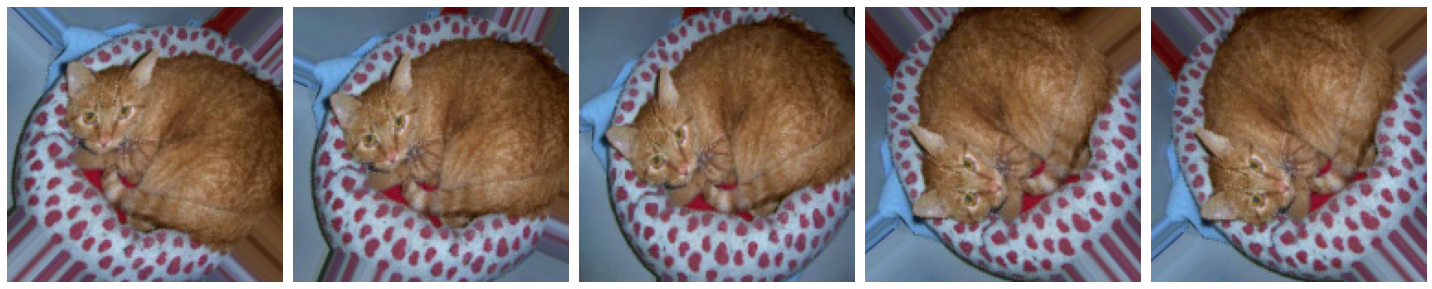

In [ ]:
image_gen = ImageDataGenerator(rescale=(1./255),rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH))
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the plotting function
plotImages(augmented_image) 

Found 2000 images belonging to 2 classes.


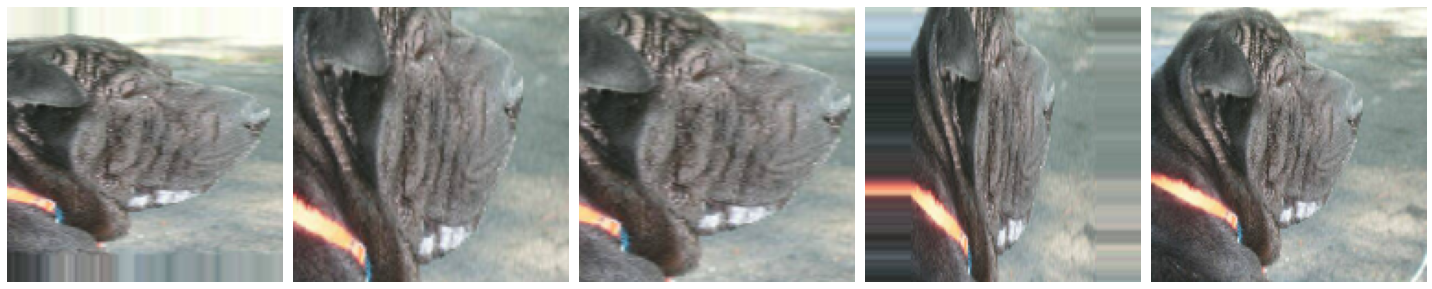

In [ ]:
image_gen = ImageDataGenerator(rescale=(1./255),zoom_range=0.5)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH))
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the plotting function
plotImages(augmented_image) 

we apply all Augmentation method like zoom,rotation 45 degree,flip,width shift,height shift

In [ ]:
image_gen_train = ImageDataGenerator(rescale=(1./255),
                                     zoom_range=0.5,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=.15,
                                     height_shift_range=.15)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


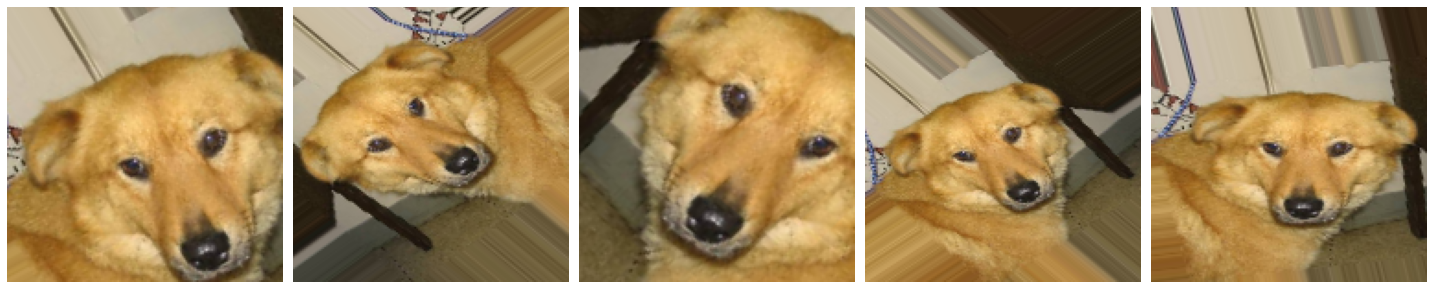

In [ ]:
augmented_image = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the plotting function
plotImages(augmented_image) 

Generally, Data augmentation is done for the training examples only.The rescaling is done for validation data from ImageDataGenerator

In [ ]:
validation_image_generator = ImageDataGenerator(rescale=(1./255))
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT,IMG_WIDTH),
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


# Dropout
“Dropout” in machine learning refers to the process of randomly ignoring certain nodes in a layer during training.
In the figure below, the neural network on the left represents a typical neural network where all units are activated. On the right, the red units have been dropped out of the model — the values of their weights and biases are not considered during training.
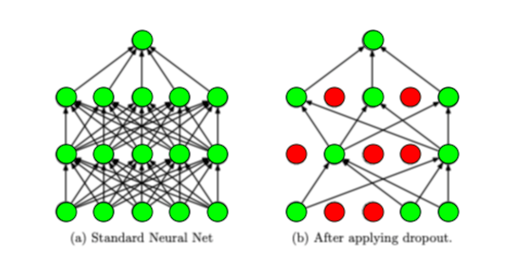
Dropout is used as a regularization technique — it prevents overfitting by ensuring that no units are codependent (more on this later).

In [ ]:
model = Sequential([
      Conv2D(16,5,padding='same',activation='relu',input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
      MaxPooling2D(),
      Dropout(0.2),
      Conv2D(32,5,padding='same',activation='relu'),
      MaxPooling2D(),
      Conv2D(64,5,padding='same',activation='relu'),
      MaxPooling2D(),
      Dropout(0.2),
      Flatten(),
      Dense(512,activation='relu'),
      Dense(1)
])

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      1216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [ ]:
history = model.fit_generator(generator=train_data_gen,
                              steps_per_epoch=total_train//batch_size,
                              epochs=epochs,
                              validation_data=val_data_gen,
                              validation_steps=total_validation//batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
15/15 [==============================] - 18s 1s/step - loss: 1.0342 - accuracy: 0.4952 - val_loss: 0.6915 - val_accuracy: 0.4967
Epoch 2/50
15/15 [==============================] - 17s 1s/step - loss: 0.6928 - accuracy: 0.4890 - val_loss: 0.6924 - val_accuracy: 0.5045
Epoch 3/50
15/15 [==============================] - 17s 1s/step - loss: 0.6929 - accuracy: 0.5010 - val_loss: 0.6930 - val_accuracy: 0.5078
Epoch 4/50
15/15 [==============================] - 17s 1s/step - loss: 0.6932 - accuracy: 0.4883 - val_loss: 0.6930 - val_accuracy: 0.5033
Epoch 5/50
15/15 [==============================] - 17s 1s/step - loss: 0.6930 - accuracy: 0.5040 - val_loss: 0.6930 - val_accuracy: 0.4944
Epoch 6/50
15/15 [==============================] - 17s 1s/step - loss: 0.6927 - accuracy: 0.4959 - val_loss: 0.6903 - val_accuracy: 0.4978
Epoch 7/50
15/15 [==============================] - 17s 1s/step - loss: 0.6924 - accuracy: 0.5045 - val_loss: 0.6847 - val_accuracy: 0.5011
Epoch 8/50
15/15 [==

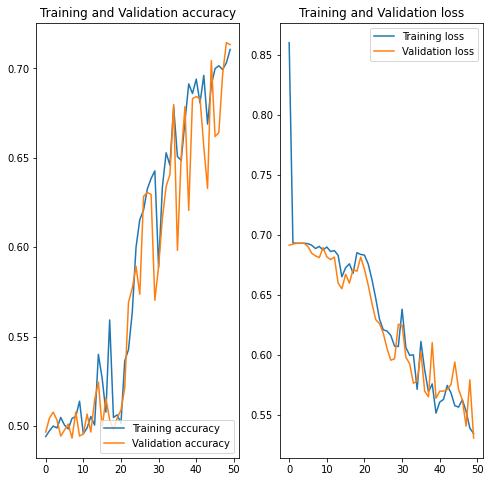

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label = 'Training accuracy')
plt.plot(epochs_range,val_acc,label = 'Validation accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label = 'Training loss')
plt.plot(epochs_range,val_loss,label = 'Validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation loss')
plt.show()

We can see that significantly less overfitting than before.The accuracy will go up after training the model with more Epochs.Tinker the model with different set of Hyperparameters.